In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries

In [2]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

import dartwork_mpl as dm

from scipy.stats import gaussian_kde
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Global variables

In [3]:
STROKE = path_effects.Stroke(linewidth=0.0, foreground='white')

# Figure 1.Grids

In [4]:
def make_points(n):
    """
    Point generator.
    """
    if n == 1:
        return np.array([0]), np.array([0])
    
    x = np.linspace(-2 * (n - 1), 2 * (n - 1), n)
    y = x

    x, y = np.meshgrid(x, y)

    return x, y

In [62]:
dm.use_dmpl_style()
# plt.rcParams['font.size'] = 9

title_n = 0

fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(14)))

offset = dm.make_offset(5, -5, fig)
offset2 = dm.make_offset(14, -5 + 0.5 * title_n, fig)

gs = fig.add_gridspec(
    2, 2, 
    left=0.07, right=0.98, bottom=0.07, top=0.98,
    wspace=0.05, hspace=0.05,
)

axs = gs.subplots(sharex=True, sharey=True)

for n, ax, abc in zip((1, 2, 4, 8), axs.flat, 'abcd'):
    x, y = make_points(n)

    ax.scatter(x, y, s=9, c='dm.red5')
    ax.text(
        0, 1, f'{abc}', transform=ax.transAxes + offset, weight='bold',
        va='top', ha='left', fontsize=dm.fs(0),
        path_effects=[STROKE],
    )

    ax.text(
        0, 1, f'{n} $\\times$ {n}', transform=ax.transAxes + offset2, weight='normal',
        va='top', ha='left', fontsize=dm.fs(title_n),
    )

for ax in axs.flat:
    ax.set_aspect(1)
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_xticks(np.arange(-18, 21, 4))
    ax.set_yticks(np.arange(-18, 21, 4))

    # 1 Minor tick between major ticks.
    ax.xaxis.set_minor_locator(MultipleLocator(2))
    ax.yaxis.set_minor_locator(MultipleLocator(2))

    # ax.grid(True, ls=(0, (1, 3)), lw=0.2, c='dm.gray6')
    ax.grid(True)

for ax in axs[:, 0]:
    ax.set_ylabel('$y$ coordinate [m]')

for ax in axs[1, :]:
    ax.set_xlabel('$x$ coordinate [m]')

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
result = dm.simple_layout(fig)

dm.save_and_show(fig)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.03659496 0.96340504 0.03659496 0.96340504]
Grid spec parameters: [0.03659497 0.96340504 0.03659496 0.96340504]
Grid spec parameters: [0.03659496 0.96340505 0.03659496 0.96340504]
Grid spec parameters: [0.03659496 0.96340504 0.03659497 0.96340504]
Grid spec parameters: [0.03659496 0.96340504 0.03659496 0.96340505]
Grid spec parameters: [0.05166019 0.96414202 0.04743301 0.96503623]
Grid

In [63]:
dm.save_formats(fig, './figure/Fig. 1. Grids')

# Figure 2. Parameter set

In [64]:
df = pd.read_csv('./data/fig2/parameter_set.csv')
df['Ground volumetric heat capacity'] /= 1e6
df['Borehole radius'] *= 100
df

BHE active length  Borehole radius  Ground thermal conductivity  \
0             99.001465         7.564697                     1.980299   
1             99.241699         7.564697                     1.980299   
2             99.001465         7.881104                     1.980299   
3             99.001465         7.564697                     2.077273   
4             99.001465         7.564697                     1.980299   
...                 ...              ...                          ...   
9795          99.537598         7.782959                     1.870962   
9796          99.537598         7.782959                     2.353154   
9797          99.537598         7.782959                     2.353154   
9798          99.537598         7.782959                     2.353154   
9799          99.537598         7.782959                     2.353154   

      Ground volumetric heat capacity  BHE distance  BHE buried depth  
0                            2.491737      4.022852          2.137695  
1                            2.491737      4.022852          2.137695  
2                            2.491737      4.022852          2.137695  
3                            2.491737      4.022852          2.137695  
4                            2.610936      4.022852          2.137695  
...                               ...           ...               ...  
9795                         2.591667      3.839258          1.911133  
9796                         2.232256      3.839258          1.911133  
9797                         2.591667      4.051367          1.911133  
9798                         2.591667      3.839258          2.152930  
9799                         2.591667      3.839258          1.911133  

[9800 rows x 6 columns]

In [65]:
columns = df.columns.to_list()
columns

['BHE active length',
 'Borehole radius',
 'Ground thermal conductivity',
 'Ground volumetric heat capacity',
 'BHE distance',
 'BHE buried depth']

In [66]:
dm.use_dmpl_style()
# plt.rcParams['font.size'] = 9

# Variable names at right top.
def rename(name):
    if name == 'BHE distance':
        return 'BHE-to-BHE distance'       
    else:
        return name  

name_dict = {
    'BHE active length' : '$H$ [m]',
    'Borehole radius' : '$r_b$ [cm]',
    'Ground thermal conductivity' : '$k_s$ [W/(m${\cdot}$K)]',
    'Ground volumetric heat capacity' : '$C_s$ [MJ/(m$^3{\cdot}$K)]', #10^6 으로 나눠서 사용하시면 됩니다. 
    'BHE distance' : '$D$ [m]',
    'BHE buried depth' : '$B$ [m]'
}

name_dict = {
    k: name_dict[k] for k in
    sorted(name_dict.keys(), key=lambda x: len(rename(x)), reverse=True)
}

columns = list(name_dict.keys())

# None values are ignored.
range_info = {
    'Ground thermal conductivity': {
    'lim': (1.50 -0.01, 2.5 +0.01),
    'ticks': (1.6, 2.4),
    'ticklabels': None,
    'nticks': 2,
    },
    'Ground volumetric heat capacity': {
        'lim': (1.7-0.02, 3.3+0.02),
        'ticks': (1.9, 3.1),
        'ticklabels': None,
        'nticks': 2,
    },
    'BHE active length': {
        'lim': (99, 100),
        'ticks': (99.1, 99.9),
        'ticklabels': None,
        'nticks': 2,
    },
    'Borehole radius': {
        'lim': (7, 8.5),
        'ticks': (7.2, 8.3),
        'ticklabels': None,
        'nticks': 2,
    },

    'BHE distance': {
        'lim': (3.8, 4.2),
        'ticks': (3.9, 4.1),
        'ticklabels': None,
        'nticks': 2,
    },
    'BHE buried depth': {
        'lim': (1.8, 2.2),
        'ticks': (1.9, 2.1),
        'ticklabels': None,
        'nticks': 2,
    },
}

bins = 21

fig = plt.figure(figsize=(dm.cm2in(15), dm.cm2in(15)))

gs = fig.add_gridspec(
    6, 6, left=0.07, right=0.98, bottom=0.07, top=0.99, wspace=0.15, hspace=0.15,    
)

axs = gs.subplots()


# Upper triangle is empty.
for r in range(6):
    for c in range(6):
        ax = axs[r, c]
        
        if r < c:
            ax.set_axis_off()

        if r == c:
            ax.yaxis.set_visible(False)


# Set y axis label.
for r, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(name_dict[columns[r]])


# Set x axis label.
for c, ax in enumerate(axs[-1, :]):
    ax.set_xlabel(name_dict[columns[c]])


# Set diagonal spines.
# which one is the better? only bottom spine or all spines?
for i in range(6):
    axs[i, i].spines['left'].set_visible(False)
    axs[i, i].spines['top'].set_visible(False)
    axs[i, i].spines['right'].set_visible(False)
    # axs[i, i].spines['left'].set_visible(True)
    # axs[i, i].spines['top'].set_visible(True)
    # axs[i, i].spines['right'].set_visible(True)

base_color = 'red'

# 1D histogram.
for i in range(6):
    axs[i, i].hist(df[columns[i]], bins=bins, color=dm.pseudo_alpha(f'dm.{base_color}4', alpha=0.5), density=True)

# 2D histogram.
for r in range(6):
    for c in range(6):
        ax = axs[r, c]
        
        if r <= c:
            continue

        

        ## Heatmap
        # h, xedges, yedges = np.histogram2d(df[columns[c]], df[columns[r]], bins=bins, density=True)
        # X, Y = np.meshgrid(xedges, yedges)
        # ax.pcolormesh(X, Y, h.T, cmap='Reds', alpha=0.7, vmax=(1.5 * h.max()))

        ## Contour
        # h, xedges, yedges = np.histogram2d(df[columns[c]], df[columns[r]], bins=bins, density=True)
        # x = 0.5 * (xedges[:-1] + xedges[1:])
        # y = 0.5 * (yedges[:-1] + yedges[1:])
        # X, Y = np.meshgrid(x, y)
        # ax.contourf(
        #     X, Y, h.T, cmap='Reds', alpha=0.7,
        #     vmax=(1.5 * h.max()), vmin=0,
        # )

        ## Scatter
        ax.scatter(
            df[columns[c]][::1], df[columns[r]][::1], s=4, c=f'dm.{base_color}5', alpha=0.05, lw=0, rasterized=True
        )


for r in range(6):
    for c in range(6):
        axs[r, c].xaxis.set_minor_locator(AutoMinorLocator(2))
        axs[r, c].yaxis.set_minor_locator(AutoMinorLocator(2))



# Set y axis range.
for r in range(6):
    name = columns[r]
    if name not in range_info:
        continue

    for c in range(r):
        ax = axs[r, c]
        # print(r, c)
        if range_info[name]['lim'] is not None:
            # print(name)
            ax.set_ylim(range_info[name]['lim'])

        if range_info[name]['ticks'] is not None:
            ax.set_yticks(range_info[name]['ticks'])

        if range_info[name]['ticklabels'] is not None:
            ax.set_yticklabels(range_info[name]['ticklabels'])

        if range_info[name]['nticks'] is not None:
            ax.yaxis.set_minor_locator(AutoMinorLocator(range_info[name]['nticks']))

        if c != 0:
            ax.set_yticklabels([])



# Set x axis range.
for c in range(6):
    name = columns[c]
    if name not in range_info:
        continue

    for r in range(6):
        # print(r, c)

        ax = axs[r, c]
        
        if range_info[name]['lim'] is not None:
            # print(name)
            ax.set_xlim(range_info[name]['lim'])

        if range_info[name]['ticks'] is not None:
            ax.set_xticks(range_info[name]['ticks'])

        if range_info[name]['ticklabels'] is not None:
            ax.set_xticklabels(range_info[name]['ticklabels'])

        if range_info[name]['nticks'] is not None:
            ax.xaxis.set_minor_locator(AutoMinorLocator(range_info[name]['nticks']))

        if r != (6 - 1):
            ax.set_xticklabels([])


  

# Text font size.
ts = dm.fs(0)
# Text y offset.
dy = 5

ordered_name_dict = {
    rename(k): name_dict[k] for k in
    sorted(name_dict.keys(), key=lambda x: len(rename(x)), reverse=True)
}

for i, (name, symbol) in enumerate(ordered_name_dict.items()):
    symbol = symbol.split()[0]

    # Right aligned.
    offset = dm.make_offset(-4, -i * (ts + dy), fig)
    fig.text(
        0.97, 0.98, f'{name}:', ha='right', va='top', fontsize=ts,
        transform=fig.transFigure + offset
    )

    offset = dm.make_offset(0, -i * (ts + dy), fig)
    fig.text(
        0.97, 0.98, f'{symbol}', ha='left', va='top', fontsize=ts,
        transform=fig.transFigure + offset
    )

    # # Left aligned.
    # offset = dm.make_offset(0, -i * (ts + dy), fig)
    # fig.text(
    #     0.6, 0.95, f'{name} ({symbol})', ha='left', va='top', fontsize=ts,
    #     transform=fig.transFigure + offset
    # )


# Remove grids.
for ax in axs.flat:
    ax.grid(False)


# Align y axis label.
fig.align_ylabels(axs[:, 0])
result = dm.simple_layout(fig)
dm.save_and_show(fig)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.04541732 0.95458268 0.04541732 0.95458268]
Grid spec parameters: [0.04541733 0.95458268 0.04541732 0.95458268]
Grid spec parameters: [0.04541732 0.95458269 0.04541732 0.95458268]
Grid spec parameters: [0.04541732 0.95458268 0.04541733 0.95458268]
Grid spec parameters: [0.04541732 0.95458268 0.04541732 0.95458269]
Grid spec parameters: [0.05498182 0.95738005 0.04343242 0.96315475]
Grid

In [67]:
dm.save_formats(fig, './figure/Fig. 2 Parameter sets generated using saltelli sampling')

# Figure 3. Temporal variation of g-function uncertainty

In [68]:
gval_data = {
    i: pd.read_csv(f'./data/fig3/gval_{i}x{i}.csv', index_col=0)
    for i in (1, 2, 4, 8)
}

gval_data[1]

1.0       2.0       3.0       4.0       5.0       7.0  \
Borefield_1     0.279743  0.521812  0.686765  0.811075  0.910691  1.064999   
Borefield_2     0.279743  0.521813  0.686767  0.811076  0.910693  1.065002   
Borefield_3     0.255416  0.490250  0.652341  0.775124  0.873792  1.026986   
Borefield_4     0.294404  0.540522  0.707057  0.832205  0.932340  1.087255   
Borefield_5     0.265747  0.503739  0.667087  0.790542  0.889630  1.043318   
...                  ...       ...       ...       ...       ...       ...   
Borefield_9796  0.235186  0.463460  0.622926  0.744305  0.842101  0.994272   
Borefield_9797  0.351812  0.611902  0.783804  0.911778  1.013652  1.170592   
Borefield_9798  0.303298  0.551766  0.719211  0.844839  0.945270  1.100528   
Borefield_9799  0.303298  0.551766  0.719211  0.844839  0.945270  1.100528   
Borefield_9800  0.303298  0.551766  0.719211  0.844839  0.945270  1.100528   

                     9.0      11.0      13.0      15.0  ...   81915.0  \
Borefield_1     1.182756  1.277976  1.357902  1.426770  ...  5.461907   
Borefield_2     1.182759  1.277979  1.357906  1.426774  ...  5.462505   
Borefield_3     1.144109  1.238920  1.318562  1.387219  ...  5.420568   
Borefield_4     1.205355  1.300793  1.380872  1.449850  ...  5.479194   
Borefield_5     1.160725  1.255720  1.335491  1.404244  ...  5.444860   
...                  ...       ...       ...       ...  ...       ...   
Borefield_9796  1.110817  1.205258  1.284642  1.353112  ...  5.395526   
Borefield_9797  1.289828  1.385991  1.466570  1.535912  ...  5.530222   
Borefield_9798  1.218818  1.314378  1.394539  1.463577  ...  5.478319   
Borefield_9799  1.218818  1.314378  1.394539  1.463577  ...  5.482648   
Borefield_9800  1.218818  1.314378  1.394539  1.463577  ...  5.478319   

                 98299.0  114683.0  131067.0  147451.0  163835.0  196603.0  \
Borefield_1     5.526977  5.580100  5.624621  5.662671  5.695691  5.750435   
Borefield_2     5.527634  5.580810  5.625380  5.663475  5.696538  5.751361   
Borefield_3     5.485610  5.538708  5.583207  5.621238  5.654242  5.708957   
Borefield_4     5.543643  5.596203  5.640206  5.677775  5.710345  5.764265   
Borefield_5     5.510525  5.564188  5.609205  5.647716  5.681168  5.736704   
...                  ...       ...       ...       ...       ...       ...   
Borefield_9796  5.461653  5.515751  5.561180  5.600083  5.633910  5.690152   
Borefield_9797  5.591301  5.640823  5.682048  5.717050  5.747229  5.796802   
Borefield_9798  5.541484  5.592896  5.635856  5.672468  5.704150  5.756465   
Borefield_9799  5.546092  5.597740  5.640906  5.677698  5.709541  5.762133   
Borefield_9800  5.541484  5.592896  5.635856  5.672468  5.704150  5.756465   

                229371.0  262139.0  294907.0  
Borefield_1     5.794213  5.830169  5.860301  
Borefield_2     5.795210  5.831230  5.861422  
Borefield_3     5.752711  5.788648  5.818763  
Borefield_4     5.807301  5.842582  5.872096  
Borefield_5     5.781194  5.817800  5.848528  
...                  ...       ...       ...  
Borefield_9796  5.735298  5.772516  5.803816  
Borefield_9797  5.835963  5.867757  5.894109  
Borefield_9798  5.798077  5.832080  5.860438  
Borefield_9799  5.803976  5.838177  5.866706  
Borefield_9800  5.798077  5.832080  5.860438  

[9800 rows x 79 columns]

In [69]:
def make_quntiles(data, n):
    x = data[n].columns.to_numpy().astype(float)
    # q = np.quantile(data[n].values, [0.025, 0.5, 0.975], axis=0)
    q = np.quantile(data[n].values, [0.0, 0.5, 1.0], axis=0)
    return x, q


x, q = make_quntiles(gval_data, 1)
q.shape

max_x = x.max()
max_x

294907.0

In [70]:
title_n = 0
label_n = 0
abc_n = 0
spacing = 1

dm.use_dmpl_style()
# plt.rcParams['font.size'] = 9

fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(10)))

offset = dm.make_offset(5, -5, fig)
offset2 = dm.make_offset(5 + dm.fs(0) + spacing, -5 + 0.5 * (title_n), fig)

gs = fig.add_gridspec(
    2, 2, left=0.07, right=0.98, bottom=0.08, top=0.94, wspace=0.1, hspace=0.1,
)

axs = gs.subplots(sharex=True, sharey=True)

for n, ax, abc in zip((1, 2, 4, 8), axs.flat, 'abcd'):
    x, y = make_points(n)

    x, q = make_quntiles(gval_data, n)

    line, = ax.plot(x, q[1], c='dm.red7', lw=0.6)

    fill_color = dm.pseudo_alpha('dm.red5', 0.2)
    fill = ax.fill_between(x, q[0], q[2], color=fill_color, lw=0)
    ax.text(
        0, 1, f'{abc}', transform=ax.transAxes + offset, weight='bold',
        va='top', ha='left', fontsize=dm.fs(abc_n), path_effects=[STROKE],
    )

    ax.text(
        0, 1, f'{n} $\\times$ {n}', transform=ax.transAxes + offset2, weight='normal',
        va='top', ha='left', fontsize=dm.fs(title_n),
    )

    if n == 2:
        ax.legend(
            [line, fill], 
            # ['Median', '95% credible interval'],
            ['Median', 'Uncertainty range'],
            loc='lower right', ncols=2, fontsize=dm.fs(label_n), bbox_to_anchor=(1.01, 1),
        )

for ax in axs.flat:
    ax.set_xlim(1, max_x)
    ax.set_ylim(0, 50)
    # ax.set_xticks(np.arange(label_n8, 21, 4))
    # ax.set_yticks(np.arange(-18, 21, 4))
    ax.set_xscale('log')
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    
for ax in axs[:, 0]:
    ax.set_ylabel('g-function [-]')

for ax in axs[1, :]:
    ax.set_xlabel('Time [h]')

result = dm.simple_layout(fig)
dm.save_and_show(fig)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.04772626 0.95699938 0.07811688 0.92984725]
Grid spec parameters: [0.04772627 0.95699938 0.07811688 0.92984725]
Grid spec parameters: [0.04772626 0.95699939 0.07811688 0.92984725]
Grid spec parameters: [0.04772626 0.95699938 0.07811689 0.92984725]
Grid spec parameters: [0.04772626 0.95699938 0.07811688 0.92984726]
Grid spec parameters: [0.04843465 0.96394317 0.08223346 0.92827666]
Grid

In [71]:
dm.save_formats(fig, './figure/Fig. 3 Temporal variation of g-function uncertainty')

# Figure 4. Transient variation of the first order sensitivity index of parameters impact on g-function

In [72]:
sa_data = {
    i: pd.read_csv(f'./data/fig4_5/SA_{i}x{i}.csv', index_col=0).T
    for i in (1, 2, 4, 8)
}

sa_data[1]

BHE active length  Borehole radius  Ground thermal conductivity  \
1.0           -4.868084e-08         0.448485                     0.200241   
2.0           -7.537743e-08         0.450024                     0.201013   
3.0           -9.923576e-08         0.450427                     0.201202   
4.0           -1.209455e-07         0.450630                     0.201276   
5.0           -1.410052e-07         0.450764                     0.201309   
...                     ...              ...                          ...   
163835.0       1.608469e-04         0.689883                     0.116428   
196603.0       2.080324e-04         0.714146                     0.107616   
229371.0       2.570116e-04         0.736100                     0.099611   
262139.0       3.072382e-04         0.756077                     0.092298   
294907.0       3.582117e-04         0.774307                     0.085598   

          Ground volumetric heat capacity  BHE distance  BHE buried depth  
1.0                              0.367206           0.0     -2.482559e-17  
2.0                              0.364848           0.0     -4.818685e-17  
3.0                              0.363973           0.0      6.439552e-17  
4.0                              0.363503           0.0     -1.122859e-16  
5.0                              0.363203           0.0     -1.707064e-16  
...                                   ...           ...               ...  
163835.0                         0.205759           0.0      1.382578e-03  
196603.0                         0.189754           0.0      1.587890e-03  
229371.0                         0.175256           0.0      1.778654e-03  
262139.0                         0.162050           0.0      1.956796e-03  
294907.0                         0.149988           0.0      2.123646e-03  

[79 rows x 6 columns]

In [73]:
columns = sa_data[1].columns.to_list()
columns

['BHE active length',
 'Borehole radius',
 'Ground thermal conductivity',
 'Ground volumetric heat capacity',
 'BHE distance',
 'BHE buried depth']

In [74]:
dm.use_dmpl_style()

cmap = plt.get_cmap('Set2')
cmap2 = plt.get_cmap('Set3')

name_dict = {
    'BHE active length' : '$H$ [m]',
    'Borehole radius' : '$r_b$ [cm]',
    'Ground thermal conductivity' : '$k_s$ [W/(m${\cdot}$K)]',
    'Ground volumetric heat capacity' : '$C_s$ [MJ/(m$^3{\cdot}$K)]', #10^6 으로 나눠서 사용하시면 됩니다. 
    'BHE distance' : '$D$ [m]',
    'BHE buried depth' : '$B$ [m]'
}

# 0의 값만 가지는 물성은 회색으로 처리.
colors = {
    'BHE active length' : cmap(6),
    'Borehole radius' : cmap(0),
    # 'Ground thermal conductivity' : cmap(5),
    'Ground thermal conductivity' : 'dm.red4',
    'Ground volumetric heat capacity' : cmap(2),
    'BHE distance' : cmap(3),
    'BHE buried depth' : cmap(7),
}

lstyles =  {
    'BHE active length' : (0, (10, 3)),
    'Borehole radius' : '-',
    'Ground thermal conductivity' : '--',
    'Ground volumetric heat capacity' : ':',
    'BHE distance' : '-.',
    'BHE buried depth' : (0, (3, 2, 1, 2, 1, 2)),
}

lwidths = {
    'BHE active length' : 0.8,
    'Borehole radius' : 0.8,
    'Ground thermal conductivity' : 0.85,
    'Ground volumetric heat capacity' : 1.0,
    'BHE distance' : 0.85,
    'BHE buried depth' : 0.8,
}

spacing = 1

fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(10)))

offset = dm.make_offset(5, -5, fig)
offset2 = dm.make_offset(5 + dm.fs(0) + spacing, -5 + 0.5 * (title_n), fig)

gs = fig.add_gridspec(
    2, 2, left=0.07, right=0.98, bottom=0.08, top=0.93, wspace=0.07, hspace=0.1,
)

axs = gs.subplots(sharex=True, sharey=True)

lines = []
for n, ax, abc in zip((1, 2, 4, 8), axs.flat, 'abcd'):
    for name in columns:
        x = sa_data[n].index.to_numpy().astype(float)
        y = sa_data[n][name].to_numpy()

        line, = ax.plot(x, y, lw=lwidths[name], c=colors[name], ls=lstyles[name])
        lines.append(line)
    
    ax.text(
        0, 1, f'{abc}', transform=ax.transAxes + offset, weight='bold',
        va='top', ha='left', fontsize=dm.fs(0), path_effects=[STROKE],
    )

    ax.text(
        0, 1, f'{n} $\\times$ {n}', transform=ax.transAxes + offset2, weight='normal',
        va='top', ha='left', fontsize=dm.fs(title_n),
    )

    if n == 1:
        ax.legend(
            lines[:3], [name_dict[name] for name in columns][:3],
            # loc='lower right', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(1.02, 1.02),
            mode='expand', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(0, 1.07, 1, 0.105),
            columnspacing=2.5,
        )

    if n == 2:
        ax.legend(
            lines[3:], [name_dict[name] for name in columns][3:],
            # loc='lower right', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(1.02, 1.02),
            mode='expand', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(0, 1.07, 1, 0.105),
            columnspacing=2.5,
        )

for ax in axs.flat:
    # ax.set_xticks(np.arange(-18, 21, 4))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xscale('log')
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.set_xlim(1, max_x)
    ax.set_ylim(-0.03, 1)
    
for ax in axs[:, 0]:
    ax.set_ylabel('First-order sensitivity index [-]')
    # ax.set_ylabel('')

# fig.text(0.025, 0.5, 'First-order sensitivity index [-]', va='center', rotation='vertical')

for ax in axs[1, :]:
    ax.set_xlabel('Time [h]')

result = dm.simple_layout(fig)
dm.save_and_show(fig)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.05011937 0.95485883 0.08222221 0.92473551]
Grid spec parameters: [0.05011938 0.95485883 0.08222221 0.92473551]
Grid spec parameters: [0.05011937 0.95485884 0.08222221 0.92473551]
Grid spec parameters: [0.05011937 0.95485883 0.08222222 0.92473551]
Grid spec parameters: [0.05011937 0.95485883 0.08222221 0.92473552]
Grid spec parameters: [0.05147768 0.96197155 0.08511565 0.92348082]
Grid

In [75]:
dm.save_formats(fig, './figure/Fig. 4 Transient variation of the first order sensitivity index of parameters impact on g-function')

# Figure 5. Transient variation of the first order sensitivity index of influential parameters on g-function

In [76]:
sa_data = {
    i: pd.read_csv(f'./data/fig4_5/SA_{i}x{i}.csv', index_col=0).T
    for i in (1, 2, 4, 8)
}

sa_data[1]

BHE active length  Borehole radius  Ground thermal conductivity  \
1.0           -4.868084e-08         0.448485                     0.200241   
2.0           -7.537743e-08         0.450024                     0.201013   
3.0           -9.923576e-08         0.450427                     0.201202   
4.0           -1.209455e-07         0.450630                     0.201276   
5.0           -1.410052e-07         0.450764                     0.201309   
...                     ...              ...                          ...   
163835.0       1.608469e-04         0.689883                     0.116428   
196603.0       2.080324e-04         0.714146                     0.107616   
229371.0       2.570116e-04         0.736100                     0.099611   
262139.0       3.072382e-04         0.756077                     0.092298   
294907.0       3.582117e-04         0.774307                     0.085598   

          Ground volumetric heat capacity  BHE distance  BHE buried depth  
1.0                              0.367206           0.0     -2.482559e-17  
2.0                              0.364848           0.0     -4.818685e-17  
3.0                              0.363973           0.0      6.439552e-17  
4.0                              0.363503           0.0     -1.122859e-16  
5.0                              0.363203           0.0     -1.707064e-16  
...                                   ...           ...               ...  
163835.0                         0.205759           0.0      1.382578e-03  
196603.0                         0.189754           0.0      1.587890e-03  
229371.0                         0.175256           0.0      1.778654e-03  
262139.0                         0.162050           0.0      1.956796e-03  
294907.0                         0.149988           0.0      2.123646e-03  

[79 rows x 6 columns]

In [77]:
columns = df.columns.to_list()
columns

['BHE active length',
 'Borehole radius',
 'Ground thermal conductivity',
 'Ground volumetric heat capacity',
 'BHE distance',
 'BHE buried depth']

In [78]:
dm.use_dmpl_style()
# plt.rcParams['font.size'] = 9

targets = [
    'Ground volumetric heat capacity',
    'Ground thermal conductivity',
    'Borehole radius',
    'BHE distance',
]

name_dict = {
    'BHE active length' : '$H$ [m]',
    'Borehole radius' : '$r_b$ [cm]',
    'Ground thermal conductivity' : '$k_s$ [W/m $\cdot$ K]',
    'Ground volumetric heat capacity' : '$C_s$ [MJ]', #10^6 으로 나눠서 사용하시면 됩니다. 
    'BHE distance' : '$D$ [m]',
    'BHE buried depth' : '$B$ [m]'
}

base_color = 'red'
cidx = [5] * 4
# cidx = [3,4,5,6] 

colors = {
    1 : f'dm.{base_color}{cidx[0]}',
    2 : f'dm.{base_color}{cidx[1]}',
    4 : f'dm.{base_color}{cidx[2]}',
    8 : f'dm.{base_color}{cidx[3]}',
}

lstyles =  {
    1 : ':',
    2 : '-.',
    4 : '--',
    8 : '-',
    # 1 : '-',
    # 2 : '--',
    # 4 : '-.',
    # 8 : ':',
}

spacing = 1

fig = plt.figure(figsize=(dm.cm2in(14), dm.cm2in(10)))

offset = dm.make_offset(5, -5, fig)
offset2 = dm.make_offset(5 + dm.fs(0) + spacing, -5 + 0.5 * (title_n), fig)

gs = fig.add_gridspec(
    2, 2, left=0.07, right=0.98, bottom=0.08, top=0.94, wspace=0.07, hspace=0.1,
)

axs = gs.subplots(sharex=True, sharey=True)

lines = []
for name, ax, abc in zip(targets, axs.flat, 'abcd'):
    for n in (1, 2, 4, 8):
        # if name == 'BHE distance' and n == 1:
        #     continue

        x = sa_data[n].index.to_numpy().astype(float)
        y = sa_data[n][name].to_numpy()

        line, = ax.plot(x, y, lw=0.7, c=colors[n], ls=lstyles[n])
        lines.append(line)
        
    ax.text(
        0, 1, f'{abc}', transform=ax.transAxes + offset, weight='bold',
        va='top', ha='left', fontsize=dm.fs(0), path_effects=[STROKE],
    )

    if name != 'BHE distance':
        ax.text(
            0, 1, f'{name} ({name_dict[name].split()[0]})', transform=ax.transAxes + offset2, weight='normal',
            va='top', ha='left', fontsize=dm.fs(-1),
        )
    else:
        ax.text(
            0, 1, f'BHE-to-BHE distance ({name_dict[name].split()[0]})', transform=ax.transAxes + offset2, weight='normal',
            va='top', ha='left', fontsize=dm.fs(-1),
        )

    if name == targets[1]:
        ax.legend(
            lines, [f'{n} $\\times$ {n}' for n in (1, 2, 4, 8)],
            # loc='lower right', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(1.02, 1.02),
            mode='expand', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(0, 1.04, 1, 0.105),
            columnspacing=2.5,
        )

        # if n == 2:
        #     ax.legend(
        #         lines[3:], [name_dict[name] for name in columns][3:],
        #         # loc='lower right', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(1.02, 1.02),
        #         mode='expand', ncols=6, fontsize=dm.fs(-1), bbox_to_anchor=(0, 1.07, 1, 0.105),
        #         columnspacing=2.5,
        #     )

for ax in axs.flat:
    ax.set_xlim(1, max_x)
    ax.set_ylim(-0.03, 1)
    # ax.set_xticks(np.arange(-18, 21, 4))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xscale('log')
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    
for ax in axs[:, 0]:
    ax.set_ylabel('First-order sensitivity index [-]')
    # ax.set_ylabel('')

# fig.text(0.025, 0.5, 'First-order sensitivity index [-]', va='center', rotation='vertical')

for ax in axs[1, :]:
    ax.set_xlabel('Time [h]')

result = dm.simple_layout(fig)
dm.save_and_show(fig)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.0502851  0.95554559 0.07806125 0.92934238]
Grid spec parameters: [0.05028511 0.95554559 0.07806125 0.92934238]
Grid spec parameters: [0.0502851  0.9555456  0.07806125 0.92934238]
Grid spec parameters: [0.0502851  0.95554559 0.07806126 0.92934238]
Grid spec parameters: [0.0502851  0.95554559 0.07806125 0.92934239]
Grid spec parameters: [0.05182393 0.96250871 0.08114312 0.92879366]
Grid

In [79]:
dm.save_formats(fig, './figure/Fig. 5 Transient variation of the first order sensitivity index of influential parameters on g-function')

# Figure 6. total heat exchange rate for 8760 hours and peak load period of cooling and heating

In [80]:
df = pd.read_csv('./data/fig6/synthetic_load.csv')
df['y'] /= 1e3

df

x         y
0        0  0.000160
1        1  0.000160
2        2  0.000160
3        3  0.000160
4        4  0.000160
...    ...       ...
8756  8756  0.035931
8757  8757  1.837282
8758  8758  4.094258
8759  8759  6.242094
8760  8760  7.808902

[8761 rows x 2 columns]

In [81]:
dm.use_dmpl_style()
# plt.rcParams['font.size'] = 8

# (a)와 그 옆의 타이틀 폰트사이즈가 다른데 같게할지 정해야 함.
abc_n = 0
title_n = 0
spacing = 1

fig = plt.figure(figsize=(dm.cm2in(16), dm.cm2in(8)))

offset = dm.make_offset(5, -4, fig)
offset2 = dm.make_offset(5 + dm.fs(0) + spacing, -4 + 0.5 * (title_n), fig)

gs = fig.add_gridspec(
    2, 2, left=0.075, right=0.975, bottom=0.1, top=0.97, wspace=0.3, hspace=0.4,
)

axs = []

# Subplot a.
ax = fig.add_subplot(gs[0, :])
axs.append(ax)

# ax.set_xticks(np.arange(0, 8761, 1000).tolist() + [8760])
ax.set_xticks(np.arange(0, 8761, 730).tolist())
# ax.set_xticks(np.arange(0, 8761, 876).tolist())
ax.set_xlim(0, 8760)

ax.text(
    0, 1, f'a', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000,
)

ax.text(
    0, 1, f'Ground thermal load', transform=ax.transAxes + offset2, weight='normal',
    va='top', ha='left', fontsize=dm.fs(title_n), zorder=1000,
)

# Subplot b.
ax = fig.add_subplot(gs[1, 0])
axs.append(ax)

# ax.set_xlim(4272, 4440)
ax.set_xlim(4272, 4392)

ax.text(
    0, 1, f'b', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000,
)

ax.text(
    0, 1, f'Peak cooling load period', transform=ax.transAxes + offset2, weight='normal',
    va='top', ha='left', fontsize=dm.fs(title_n), zorder=1000,
)

# Subplot c.
ax = fig.add_subplot(gs[1, 1])
axs.append(ax)

# ax.set_xlim(8592, 8760)
ax.set_xlim(8640, 8760)

ax.text(
    0, 1, f'c', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000,
)

ax.text(
    0, 1, f'Peak heating load period', transform=ax.transAxes + offset2, weight='normal',
    va='top', ha='left', fontsize=dm.fs(title_n), zorder=1000,
)

axs = np.array(axs)
for i, ax in enumerate(axs):
    if i == 0:
        lw = 0.3
        alpha=0.1
    else:
        lw = 0.8
        alpha=0.05

    ax.plot(df['x'][:2200], df['y'][:2200], lw=lw, c='dm.red6')
    ax.plot(df['x'][2200:6600], df['y'][2200:6600], lw=lw, c='dm.blue6')
    ax.plot(df['x'][6600:], df['y'][6600:], lw=lw, c='dm.red6')
    ax.fill_between([4272, 4392], [-220, -220], [220, 220], fc=dm.pseudo_alpha('dm.blue5', alpha), lw=0, zorder=-1)
    ax.fill_between([8640, 8760], [-220, -220], [220, 220],  fc=dm.pseudo_alpha('dm.red5', alpha), lw=0, zorder=-1)

    ax.set_ylim(-220, 220)
    ax.set_xlabel('Time [h]')
    ax.set_ylabel('Heat rate [kW]')

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.grid(False)

axs[1].xaxis.set_major_locator(MultipleLocator(24))
axs[2].xaxis.set_major_locator(MultipleLocator(24))
# axs[1].set_xticks(np.arange())




fig.align_ylabels(axs[:2])

result = dm.simple_layout(fig)
dm.save_and_show(fig, size=700)

Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.05967676 0.94770165 0.066608   0.93916494]
Grid spec parameters: [0.05967677 0.94770165 0.066608   0.93916494]
Grid spec parameters: [0.05967676 0.94770166 0.066608   0.93916494]
Grid spec parameters: [0.05967676 0.94770165 0.06660801 0.93916494]
Grid spec parameters: [0.05967676 0.94770165 0.066608   0.93916495]
Grid spec parameters: [0.06106371 0.95295117 0.07134205 0.9391968 ]
Grid

In [82]:
dm.save_formats(fig, './figure/Fig. 6 total heat exchange rate for 8760 hours and peak load period of cooling and heating')

# Figure 7. Variation of outlet fluid temperature of BHE throughout 8760 hours and during peak time

In [27]:
# old time range 
# # 8592, 8760


# df = pd.read_csv('./data/fig7/4x4.csv')
# df.drop(columns=['Unnamed: 0'], inplace=True)

# x = df.columns.to_numpy().astype(float).astype(int)
# quantiles = np.quantile(df.values, [0, 0.025, 0.5, 0.975, 1.0], axis=0)

# # Find distribution at minimum position.
# i = np.argmin(quantiles[1][8640:])
# print(x[8592:][i])

# data1 = df.values[:, 8592:][:, i]

# # Find maximum position.
# i = np.argmax(quantiles[1][4440:4608])
# print(x[4440:4608][i])

# data2 = df.values[:, 4440:4608][:, i]

# # Save data to be visualized in the next figure.
# np.savetxt('./data/fig7/x.csv', x, delimiter=',')
# np.savetxt('./data/fig7/data1.csv', data1, delimiter=',')
# np.savetxt('./data/fig7/data2.csv', data2, delimiter=',')
# np.savetxt('./data/fig7/quantiles.csv', quantiles, delimiter=',')

In [28]:
# # new time range   [8640, 8760], [4272, 4392], 8725, 4357
   

# df = pd.read_csv('./data/fig7/4x4.csv')
# df.drop(columns=['Unnamed: 0'], inplace=True)

# x = df.columns.to_numpy().astype(float).astype(int)
# quantiles = np.quantile(df.values, [0, 0.025, 0.5, 0.975, 1.0], axis=0)

# # Find distribution at minimum position.
# i = np.argmin(quantiles[1][8640:])
# print(x[8640:][i])

# data1 = df.values[:, 8640:][:, i]

# # Find maximum position.
# i = np.argmax(quantiles[1][4272:4392])
# print(x[4272:4392][i])

# data2 = df.values[:, 4272:4392][:, i]

# # Save data to be visualized in the next figure.
# np.savetxt('./data/fig7/x.csv', x, delimiter=',')
# np.savetxt('./data/fig7/data1.csv', data1, delimiter=',')
# np.savetxt('./data/fig7/data2.csv', data2, delimiter=',')
# np.savetxt('./data/fig7/quantiles.csv', quantiles, delimiter=',')

In [83]:
# Load data to be visualized in the next figure.
x = np.loadtxt('./data/fig7/x.csv', delimiter=',')
data1 = np.loadtxt('./data/fig7/data1.csv', delimiter=',')
data2 = np.loadtxt('./data/fig7/data2.csv', delimiter=',')
quantiles = np.loadtxt('./data/fig7/quantiles.csv', delimiter=',')

# CI 95%.
# quantiles = quantiles[1:-1]

# Full CI.
quantiles = quantiles[[0, 2, 4]]


# Caution for loading temperature PDF (time has been changed from 4525 to 4357)

data1_x = np.linspace(-3, 3, 1000)
data1_y = gaussian_kde(data1)(data1_x)

data2_x = np.linspace(29, 35, 1000)
data2_y = gaussian_kde(data2)(data2_x)

In [84]:
dm.use_dmpl_style()
# plt.rcParams['font.size'] = 7

range_info = {
    'a': {
        'xlim': (0, 8760),
        'xticks': np.arange(0, 8761, 730),
        'xticklabels': None,
        'ylim': (-5, 45),
        'yticks': (-5, 5, 15, 25, 35, 45),
        'yticklabels': None,
    },
    'b': {
        # 'xlim': (4440, 4608),
        'xlim': (4272, 4392),
        'xticks': None,
        'xticklabels': None,
        'ylim': (13, 38),
        'yticks': np.arange(15, 36, 5),
        'yticklabels': None,
    },
    'c': {
        'xlim': (8640, 8760),
        'xticks': None,
        'xticklabels': None,
        'ylim': (-6, 19),
        'yticks': np.arange(-4, 17, 5),
        'yticklabels': None,
    },
    'd': {
        'xlim': (29, 35),
        'xticks': np.arange(29, 35.5, 1),
        'xticklabels': None,
        'ylim': (0, 1),
        'yticks': (0, 0.5, 1),
        'yticklabels': None,
    },
    'e': {
        'xlim': (-3, 3),
        'xticks': np.arange(-3, 3.5, 1),
        'xticklabels': None,
        'ylim': (0, 1),
        'yticks': (0, 0.5, 1),
        'yticklabels': None,
    }
    
}

fill_colors = {
    'a': {
        'low': 'dm.red6',
        'high': 'dm.blue6',
    },
    'b': {
        'low': 'dm.red6',
        'high': 'dm.blue6',
    },
    'c': {
        'low': 'dm.red6',
        'high': 'dm.blue6',
    },
    'd': 'dm.blue5',
    'e': 'dm.red5',
}

# Font sizes.
abc_n = 0
title_n = 0
label_n = 0
legend_n = -1
spacing = 1

fig = plt.figure(figsize=(dm.cm2in(16), dm.cm2in(13)))

offset = dm.make_offset(5, -4, fig)
offset2 = dm.make_offset(5 + dm.fs(0) + spacing, -4 + 0.5 * (title_n), fig)

gs = fig.add_gridspec(
    3, 2, left=0.075, right=0.975, bottom=0.07, top=0.97, wspace=0.3, hspace=0.4,
)

axs = []

# Subplot a.
ax = fig.add_subplot(gs[0, :])
axs.append(ax)

ax.set_xlabel('Time [h]', fontsize=dm.fs(label_n))
ax.set_ylabel('Outlet fuild temperature [$^{\circ}$C]', fontsize=dm.fs(label_n))

ax.text(
    0, 1, f'a', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000, path_effects=[STROKE],
)

# ax.text(
#     0, 1, f'Outlet fluid temperature', transform=ax.transAxes + offset2, weight='normal',
#     va='top', ha='left', fontsize=dm.fs(title_n), zorder=1000,
# )

# Subplot b.
ax = fig.add_subplot(gs[1, 0])
axs.append(ax)

ax.set_xlabel('Time [h]', fontsize=dm.fs(label_n))
ax.set_ylabel('Outlet fuild temperature [$^{\circ}$C]', fontsize=dm.fs(label_n))

ax.text(
    0, 1, 'b', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000, path_effects=[STROKE],
)

# Subplot c.
ax = fig.add_subplot(gs[1, 1])
axs.append(ax)

ax.set_xlabel('Time [h]', fontsize=dm.fs(label_n))
ax.set_ylabel('Outlet fuild temperature [$^{\circ}$C]', fontsize=dm.fs(label_n))

ax.text(
    0, 1, f'c', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000, path_effects=[STROKE],
)


# Subplot d.
ax = fig.add_subplot(gs[2, 0])
axs.append(ax)

ax.set_xlabel('Outlet fuild temperature [$^{\circ}$C]', fontsize=dm.fs(label_n))
ax.set_ylabel('Probability density [$1/^{\circ}$C]', fontsize=dm.fs(label_n))

ax.text(
    0, 1, 'd', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000, path_effects=[STROKE],
)

# Subplot e.
ax = fig.add_subplot(gs[2, 1])
axs.append(ax)

ax.set_xlabel('Outlet fuild temperature [$^{\circ}$C]', fontsize=dm.fs(label_n))
ax.set_ylabel('Probability density [$1/^{\circ}$C]', fontsize=dm.fs(label_n))

ax.text(
    0, 1, 'e', transform=ax.transAxes + offset, weight='bold',
    va='top', ha='left', fontsize=dm.fs(abc_n), zorder=1000, path_effects=[STROKE],
)


axs = np.array(axs)
for i, (abc, ax) in enumerate(zip('abc', axs[:3])):
    if i == 0:
        lw = 0.2
        alpha=0.1
    else:
        lw = 0.5
        alpha=0.05

    line, = ax.plot(x, quantiles[1], lw=lw, c='dm.gray8')
    fill = ax.fill_between(x, quantiles[0], quantiles[2], color=dm.pseudo_alpha('dm.gray3', alpha=1), lw=0)

    low_fill = ax.fill_between(
        [8640, 8760], [-10, -10], [45, 45],
        fc=dm.pseudo_alpha(fill_colors[abc]['low'], alpha=alpha), lw=0, zorder=-10
    )

    high_fill = ax.fill_between(
        [4272, 4392], [-10, -10], [45, 45],
        fc=dm.pseudo_alpha(fill_colors[abc]['high'], alpha=alpha), lw=0, zorder=-10
    )

    if i == 0:
        ax.legend(
            [line, fill, high_fill, low_fill],
            ['Median', 'Uncertainty range', 'Peak cooling load', 'Peak heating load'],
            loc='upper right',
            fontsize=dm.fs(legend_n),
            ncols=1,
            bbox_to_anchor=(0, 0, 0.98, 1)
        )


    if i == 2:
        ax.axvline(8725, c=fill_colors[abc]['low'], lw=0.5, ls=':')

    if i == 1:
        # ax.axvline(4525, c=fill_colors[abc]['high'], lw=0.5, ls=':')
        ax.axvline(4357, c=fill_colors[abc]['high'], lw=0.5, ls=':')


axs[1].xaxis.set_major_locator(MultipleLocator(24))
axs[2].xaxis.set_major_locator(MultipleLocator(24))

ax = axs[3]
ax.fill(data2_x, data2_y, fc=dm.pseudo_alpha(fill_colors['d'], alpha=0.4), lw=0)

ax = axs[4]
ax.fill(data1_x, data1_y, fc=dm.pseudo_alpha(fill_colors['e'], alpha=0.4), lw=0)

for abc, ax in zip('abcde', axs):
    print(abc)

    if range_info[abc]['xticks'] is not None:
        ax.set_xticks(range_info[abc]['xticks'])

    if range_info[abc]['xlim'] is not None:
        ax.set_xlim(range_info[abc]['xlim'])

    if range_info[abc]['xticklabels'] is not None:
        ax.set_xticklabels(range_info[abc]['xticklabels'])

    if range_info[abc]['yticks'] is not None:
        ax.set_yticks(range_info[abc]['yticks'])

    if range_info[abc]['ylim'] is not None:
        ax.set_ylim(range_info[abc]['ylim'])

    if range_info[abc]['yticklabels'] is not None:
        ax.set_yticklabels(range_info[abc]['yticklabels'])

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.grid(False)

fig.align_ylabels(axs[:2])

result = dm.simple_layout(fig)
dm.save_and_show(fig, size=600)

a
b
c
d
e
Grid spec parameters: [0. 1. 0. 1.]
Grid spec parameters: [1.e-08 1.e+00 0.e+00 1.e+00]
Grid spec parameters: [0.         0.99999999 0.         1.        ]
Grid spec parameters: [0.e+00 1.e+00 1.e-08 1.e+00]
Grid spec parameters: [0.         1.         0.         0.99999999]
Grid spec parameters: [0.1 0.9 0.1 0.9]
Grid spec parameters: [0.09999999 0.9        0.1        0.9       ]
Grid spec parameters: [0.1        0.90000001 0.1        0.9       ]
Grid spec parameters: [0.1        0.9        0.09999999 0.9       ]
Grid spec parameters: [0.1        0.9        0.1        0.90000001]
Grid spec parameters: [0.04863951 0.95136049 0.04863951 0.95136049]
Grid spec parameters: [0.04863952 0.95136049 0.04863951 0.95136049]
Grid spec parameters: [0.04863951 0.9513605  0.04863951 0.95136049]
Grid spec parameters: [0.04863951 0.95136049 0.04863952 0.95136049]
Grid spec parameters: [0.04863951 0.95136049 0.04863951 0.9513605 ]
Grid spec parameters: [0.05108861 0.95563771 0.05157248 0.9548

In [86]:
dm.save_formats(fig, './figure/Fig. 7 Variation of outlet fluid temperature of BHE throughout 8760 hours and during peak time')

# Figure 8. Variation of OFT probability density function due to reduced parameter uncertainty

In [32]:
# with open('./data/fig8/C.csv', 'r') as f:
#     x = np.array([float(v) for v in f.readline().split(',')[1:]])
#     y = np.array([float(v) for v in f.readline().split(',')[1:]])

# print(np.argmin(y))
# print(x[np.argmin(y)])

In [33]:
# Peak hour for heating and cooling: 8725, 4357

# data_dict = {
#     'all': pd.read_csv('./data/fig8/all.csv', usecols=[8725]).values,
#     'C': pd.read_csv('./data/fig8/C.csv', usecols=[8725]).values,
#     'd': pd.read_csv('./data/fig8/d.csv', usecols=[8725]).values,
#     'ks': pd.read_csv('./data/fig8/ks.csv', usecols=[8725]).values,
#     'original': pd.read_csv('./data/fig8/original.csv', usecols=[8725]).values,
#     'rb': pd.read_csv('./data/fig8/rb.csv', usecols=[8725]).values,
# }

# df = pd.DataFrame({k: v.flatten() for k, v in data_dict.items()})
# df.to_csv('./data/fig8/pdf.csv')

In [34]:
df = pd.read_csv('./data/fig8/pdf.csv', index_col=0)
df

all         C         d        ks  original        rb
0    -0.205098 -0.283430 -0.293529 -0.263680 -0.292504 -0.243237
1    -0.187086 -0.265264 -0.275416 -0.245496 -0.274341 -0.225194
2    -0.267082 -0.371473 -0.381600 -0.352884 -0.380515 -0.304565
3    -0.095579 -0.043688 -0.053650 -0.159909 -0.052466  0.008651
4    -0.116827 -0.195587 -0.085798 -0.056900 -0.084937 -0.034231
...        ...       ...       ...       ...       ...       ...
9795 -0.227008 -0.486554 -0.381495 -0.200543 -0.388669 -0.338855
9796  0.115708  0.426725  0.191704 -0.258431  0.176856  0.295659
9797  0.458945  0.765800  0.844047  0.448621  0.846709  0.969446
9798  0.447931  0.739826  0.832542  0.426603  0.822212  0.944948
9799  0.447369  0.739264  0.831999  0.426041  0.821661  0.944400

[9800 rows x 6 columns]

In [35]:
end_a = 0.9
start_a = 0.2

# cc = (np.exp(np.linspace(0, 1, 6)) - 1) / (np.e - 1) * (start_a - end_a) + end_a
# cc

cc = np.linspace(start_a, end_a, 6)

# # Write cols in reverse order.
# cols = ['all', 'ks', 'C', 'd', 'rb', 'original']

cols = ['original', 'rb', 'd', 'C', 'ks', 'all']

colors = [
    # f'dm.red{i}' for i in range(1, 7, 1)
    dm.pseudo_alpha('dm.red7', alpha=a) for a in cc
]

name_dict = {
    # 'original' : 'Original uncertainty',
    # 'rb' : 'Reduced $r_b$',
    # 'ks' : 'Reduced $k_s$',
    # 'C' : 'Reduced $C_s$', #10^6 으로 나눠서 사용하시면 됩니다. 
    # 'd' : 'Reduced $D$',
    # 'all' : 'Reduced $r_b$, $D$, $C_s$, $k_s$'
    'original' : 'Original uncertainty',
    'rb' : 'Reduce $r_b$ uncertatiny',
    'ks' : 'Reduce $k_s$ uncertatiny',
    'C' : 'Reduce $C_s$ uncertatiny', #10^6 으로 나눠서 사용하시면 됩니다. 
    'd' : 'Reduce $D$ uncertatiny',
    'all' : 'Reduce all ($r_b$, $D$, $C_s$, $k_s$)'
}

x = np.linspace(-2.5, 2, 100)
y_dict = {
    k: gaussian_kde(df[k])(x) for k in cols
}

In [36]:
dm.use_dmpl_style()

fig = plt.figure(figsize=(dm.cm2in(9), dm.cm2in(7.5)))

# hspace로 ridge plot 간격 설정할 수 있음.
gs = fig.add_gridspec(
    6, 1, left=0.08, right=0.97, bottom=0.13, top=0.97, hspace=-0.3,
)

axs = gs.subplots(sharex=True)

for i, ax in enumerate(axs.flat):
    name = cols[i]
    color = colors[i]

    ax.fill_between(x, y_dict[name], fc=color, lw=0.0, ec='white')
    ax.plot(x, y_dict[name], lw=0.75, c='white')
    # ax.plot([0, 1], [0, 1], zorder=100+i, clip_on=False)
    ax.grid(False)

    # 5.6
    # 3.5 
    # Last subplot (bottom).
    if i == 5:
        # ax.set_xlabel('Outlet fluid temperature of borefield [$^{\circ}$C]', ha='right', position=(0.96, 30))
        ax.set_xlim(-4, 1.6)
        ax.set_ylim(0, None)
        ax.set_xticks(np.arange(-2.0, 1.51, 0.7))
        # X축 tick size. 0도 괜찮을 것 같음 (정량적인 것보다는 상대적 넓이가 중요하기 때문에).
        ax.xaxis.set_tick_params(which='major', size=1)
    
    if i != 5:
        ax.spines['bottom'].set(linewidth=0.5, color='dm.gray4')
        # Remove minior ticks.
        ax.xaxis.set_tick_params(which='both', bottom=False)
        # ax.yaxis.set_tick_params(which='both', bottom=False)
    
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.set_yticks([])

    ax.patch.set_alpha(0.0)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Text 배치가 달라지면 grid spec도 수정해야 함.

    # 오른쪽에 배치.
    offset = dm.make_offset(0, 1, fig)
    ax.text(0, 0, name_dict[name], transform=ax.transAxes + offset, 
            weight='normal', va='bottom', ha='left', 
            fontsize=dm.fs(-0.5))
    # 왼쪽에 배치.
    # offset = dm.make_offset(-5, 0, fig)
    # ax.text(0, 0, name_dict[name], transform=ax.transAxes + offset, weight='normal', va='center', ha='right', fontsize=dm.fs(-2))


# xlim: -4, 1.6
# fig space: 0.1 0.95

# Data coordinate.
cx = (-2.0 + 1.5) / 2

# Axes coordinate.
cx = (cx - (-4)) / (1.6 - (-4))

# Fig coordinate.
cx = 0.08 + (0.97-0.08) * cx

fig.text(cx, 0.04, 'Outlet fluid temperature of borefield [$^{\circ}$C]', va='center', ha='center')

fig.text(0.02, 0.55, 'Probability density [1/$^{\circ}$C]', va='center', rotation='vertical')

dm.save_and_show(fig) 


In [60]:
dm.save_formats(fig, './figure/Fig. 8 Variation of OFT probability density function due to reduced parameter uncertainty')

# Palettable colormap example

In [37]:
from palettable.scientific.sequential import Acton_20

ModuleNotFoundError: No module named 'palettable'

In [ ]:
Acton_20.mpl_colormap(1)

(0.1841906958861976, 0.13291810841983853, 0.3051749327181853, 1.0)

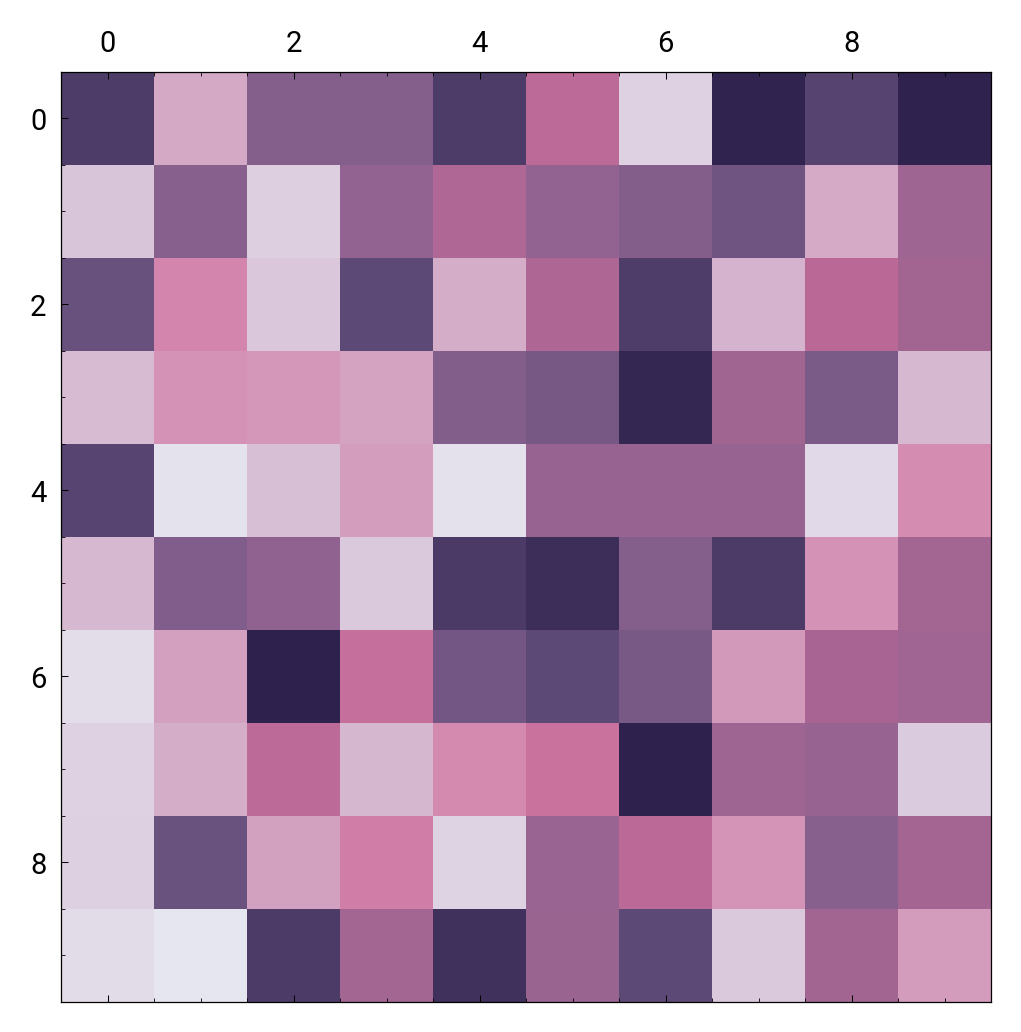

In [ ]:
plt.matshow(np.random.uniform(size=(10, 10)), cmap=Acton_20.mpl_colormap)